# Q Learning

To find out which classifier is best for which level we use the Q learning algorithm. The Q learner learns the best policy, which is the best classifier used for every level. The Q agent gets punished for every operation it has to perform while inference and gets rewarded for every right prediction. 

The tradeoff between these two factors (operations vs accuracy) is controlled using a paremeter called gamma. The parameter can be changed in the config.py file. 

Let us learn more about our Qagent and start by importing the required packages.

In [1]:
import load_datafiles
from q_agent import QAgent 
import multiprocessing as mp
import numpy as np
import config as cfg
from diagrams import  get_classifiers_for_gamma
from data_prep import Dataset

Load the dataset and map the classifiers numbers to their names.

In [2]:
dff = load_datafiles.load_data()

In [3]:
classifiers = {

    0: "knn",
    1: "knn",
    2: "knn",
    3: "knn",
    4: "knn",
    5: "tree",
    6: "forest",
    7: "forest",
    8:"forest",
    9: "forest",

}

## Set up the Q agent

To set up the Q agent we pass the dataset to the object. Then we subset the data to 10 instances per class. This is because the Q agent is very slow and letting it run on the whole dataset would take a lot of time. For the sake of this small tutorial we will only apply it on a subset of the data.

In [4]:
q_agent = QAgent(*dff)
q_agent.subset_data(10)

## Learn!

To make the Q agent learn we call the learn function which calculates the Q matrix, the optimal policy and the accumalted rewards per episode. This is gonna take a while so don't rush.

In [5]:
value_per_episode = q_agent.learn()

In [6]:
for action in q_agent.optimal_policy:
    print(classifiers[action])

forest
forest
knn
knn
knn


### Why does the Q learner lean towards KNNs?

We can see that the optimal policy is mainly Knns.

This is because we only run the Q agent for 3 episodes and on a limited amount of the data. The Q agent didn't have enough time to learn the best policy, please refer to the report and presentation to see the accurate results. 

### How does our Q matrix look like?

In [7]:
q_agent.q_matrix

array([[ 95.09818745,  87.39067506,  89.44450666,  85.9018671 ,
         54.72076756, 102.54174306,  96.36543071, 171.96318289,
        109.09183213],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ 44.66027384,  38.48838653,  23.76408654,  41.32292245,
         33.32412689,  51.08355772,  29.06772295,  69.94123296,
         50.49681626],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

## The Q agent for every Gamma

We want to see how the behaviour of the Q agent changes with different values of gama. Luckily there is function that we can use to find out. This will also take some time, so please be patient!

In [1]:
import matplotlib.pyplot as plt

opt_policies = get_classifiers_for_gamma(10)

x = [x * 0.1 for x in range(len(opt_policies)) ]
fig, ax = plt.subplots()

for index in range(len(opt_policies[0])):
    y = []
    for clf in [x[index] for x in opt_policies]:
        y.append(classifiers[clf])
    
    ax.plot(x, y, linestyle='solid', label='classifier '+str(index+1))
    ax.scatter(x, y)

    ax.set_xlabel('Gamma')
    ax.set_ylabel('Action')
    ax.legend(loc='upper left')

plt.show()

NameError: name 'get_classifiers_for_gamma' is not defined

### How does our optimal policy perform?

To see how the optimal policies for every gamma perform, we are plotting the hierarchical f-measure and the number of operations for every Gamma value

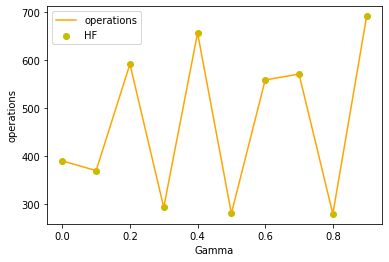

In [10]:
import matplotlib.pyplot as plt
from hierarchical_classification import HierarchicalClassificationModel

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

beta = 1

f_measures = []
ops = []
dataset = Dataset(*dff)

for clfs in opt_policies:

    clf = HierarchicalClassificationModel(dataset)
    clf.set_classifiers([clfs[0], clfs[1], clfs[2], clfs[3], clfs[4]])

    h = clf.get_scores_k_fold(splits=10)
    f_measure = ((beta * beta + 1) * h[0][1] * h[0][2]) / ((beta * beta) * h[0][1] + h[0][2])

    f_measures.append(f_measure)
    ops.append(h[1])

x = [x * 0.1 for x in range(len(opt_policies))]

ax1.plot(x, f_measures, linestyle='solid', label='HF')
ax2.plot(x, ops, color='orange', linestyle='solid', label='operations')

ax1.scatter(x, f_measures)
ax2.scatter(x,  ops, c=['y'], cmap='viridis', label='HF')



ax1.set_xlabel('Gamma')
ax1.legend(loc='upper left')

ax2.set_xlabel('Gamma')
ax2.set_ylabel('operations')
ax2.legend(loc='upper left')


plt.show()